In [1]:
from pathlib import Path
import imageio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# These .py files define the objects that load calibration data and do the rectification
%run -i calibration
%run -i rectifier

In [3]:
# The Axiom software included ways to build these filename arrays
image_files    = ['./data/images/1548097201.Mon.Jan.21_19_00_01.GMT.2019.manos.c1.timex.jpg',\
               './data/images/1548097201.Mon.Jan.21_19_00_01.GMT.2019.manos.c2.timex.jpg',\
               './data/images/1548097201.Mon.Jan.21_19_00_01.GMT.2019.manos.c5.timex.jpg',\
               './data/images/1548097201.Mon.Jan.21_19_00_01.GMT.2019.manos.c6.timex.jpg']

calibration_files = ['./data/camera_calibration/17512833_c1_20180809_xyz_lcp.mat',\
                     './data/camera_calibration/17512834_c2_20180809_xyz_lcp.mat',\
                     './data/camera_calibration/17512818_c5_20180809_xyz_lcp.mat',\
                     './data/camera_calibration/17512836_c6_20180809_xyz_lcp.mat']

In [4]:
xmin = -50.
xmax = 651.
ymin = 0.
ymax = 2501.
dx = 1.
dy = 1.
z = -0.91

rectifier_grid = TargetGrid(
    [xmin, xmax],
    [ymin, ymax],
    dx,
    dy,
    z
)

rectifier = Rectifier(
    rectifier_grid
)

In [5]:
%%time
rectified_image = rectifier.rectify_images(
    [str(s) for s in image_files],
    [str(s) for s in calibration_files],
    )

Wall time: 39.6 s


In [6]:
imageio.imwrite('test_image.jpg',rectified_image)

Lossy conversion from float64 to uint8. Range [0.0, 255.00000000000006]. Convert image to uint8 prior to saving to suppress this warning.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


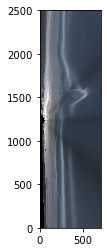

In [7]:
plt.imshow( rectified_image.astype(np.int))
plt.gca().invert_yaxis()